<a target="_blank" href="https://colab.research.google.com/github/ylepen/Corrections-R/">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Instalation des packages si besoin:

In [9]:
#install.pakages("googledrive")
#install.pakages("lubridate")
#install.packages("TT")
#install.packages("quantmod")
#install.packages('yahoofinancer')
#install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘Rcpp’, ‘later’, ‘crosstalk’, ‘promises’, ‘DT’, ‘data.tree’, ‘htmlwidgets’




# Chapitre I, exercice 4 : Etude préliminaire du CAC 40

Le but de ce premier exercice est de vous faire manipuler des données de type séries temporelles sous R. Pour cela, vous trouverez les observations quotidiennes de l'indice CAC40 du 09/07/1987 au 12/06/2019 dans deux fichiers au format .csv  sur le drive suivant: [ici]("https://drive.google.com/file/d/1YwRPBpF9LcilV_1gQMVxEEvklQvq13zk/view?usp=share_link"). Chaque fichier a été préalablement téléchargé sur les data provider suivant "Yahoo" (^FCHI.csv) et "Datastream" (cac40_datastream.csv).


## Question 1: Importation des données

### Réponse 1, option 1 : à partir d'un fichier de données


> Par soucis de reproductibilité nous avons au préalable chargé les données dans un google drive de manière a ce que chacun d'entre vous est accs au données peut importe son environoment de travail. Vous pouvez bien sur aussi les télécharger sur votre PC depuis GitHub: le lien est le suivant: [ici](https://github.com/ylepen/Corrections-R/tree/main/chapitre%201/data) et ensuite les uploader à la main dans l'environement colab. Ici, nous le faison de manière automatqiue, en loadant les données du drive directement dans le workspace de ce notebook google colab notebook. Pour cela on utilise la librairie googledrive.

In [ ]:
library(googledrive)

#### Source : fichier csv provenant de Datastream

> Import du premier fichier cac40_datastream.csv dans l'environement de travail.

> Source : Datastream

> Datastream est une base de données payante accessible à la BU Dauphine. Elle présente l'avantage de fournir des données complètes. Le séparateur de décimale est le point "."

In [ ]:
drive_download("https://drive.google.com/file/d/1vo0To5q9LCGCk6b1fdgT5nS-SM3oxvT6/view?usp=share_link")

File downloaded:

• cac40_datastream.csv <id: 1vo0To5q9LCGCk6b1fdgT5nS-SM3oxvT6>

Saved locally as:

• cac40_datastream.csv



In [ ]:
CAC40_df_1<-read.csv2("cac40_datastream.csv",dec=".",col.names = c('Date','CAC40'))
head(CAC40_df_1)

,Date,CAC40
,<chr>,<dbl>
1,09/07/1987,1482.89
2,10/07/1987,1490.42
3,13/07/1987,1490.42
4,14/07/1987,1490.42
5,15/07/1987,1490.42
6,16/07/1987,1474.22


On convertit la colonne Date au format date Year/Month/Day

In [ ]:
CAC40_df_1$Date<-as.Date(CAC40_df_1$Date,format = "%d/%m/%Y")
tail(CAC40_df_1$Date)


#library(lubridate)
#CAC40_df_1$Date<-dmy(CAC40_df_1$Date)

[1] "2023-06-19" "2023-06-20" "2023-06-21" "2023-06-22" "2023-06-23"
[6] "2023-06-26"

On vérifie qu'il n'y a pas de données manquantes

In [ ]:
sapply(CAC40_df_1,function(x) sum(is.na(x)))

Date CAC40 
    0     0

Les données commencent en "1987-07-09". On décide d'étudier la série à partir de "1990-01-01" en partie pour avoir le même échantillon que les autres sources de données.

In [ ]:
CAC40_df_1<-CAC40_df_1[CAC40_df_1$Date>="1990-01-01",]

#### Source : fichier csv provenant de Yahoo Finance



> Import du second fichier ^FCHI.csv dans l'environement de travail.

> Source : Datastrea Yahoo Finance

> Les données de Yahoo contiennent des données manquantes représentées par le terme ''null''. Avec R, "null" n'est pas le symbole habituel des données manquantes qui est "na". Dans l'importation des données à partir de la fonction read.csv, on ajoute l'option na.strings=c("null") pour lui indiquer que le symbole des données manquantes dans le fichier ^FCHI.csv.

In [ ]:
drive_download("https://drive.google.com/file/d/1YwRPBpF9LcilV_1gQMVxEEvklQvq13zk/view?usp=share_link")

In [ ]:
CAC40_df_2<-read.csv("^FCHI.csv",na.strings=c("null"))
class(CAC40_df_2)
str(CAC40_df_2)

[1] "data.frame"

'data.frame':	8605 obs. of  7 variables:
 $ Date     : chr  "1990-03-01" "1990-03-02" "1990-03-05" "1990-03-06" ...
 $ Open     : num  1836 1831 1866 1869 1874 ...
 $ High     : num  1838 1860 1874 1875 1881 ...
 $ Low      : num  1827 1831 1862 1866 1874 ...
 $ Close    : num  1832 1860 1874 1872 1880 ...
 $ Adj.Close: num  1832 1860 1874 1872 1880 ...
 $ Volume   : int  0 0 0 0 0 0 0 0 0 0 ...


Décompte des données manquantes :

In [ ]:
sapply(CAC40_df_2,function(x) sum(is.na(x)))

Date      Open      High       Low     Close Adj.Close    Volume 
        0       147       147       147       147       147       147

Il existe plusieurs manières de gérer les données manquantes. On décide ici de supprimer les dates ayant des données manquantes car elles peuvent empécher l'éxécution de certaines fonctions de R.

In [ ]:
CAC40_df_2<-na.omit(CAC40_df_2)
sapply(CAC40_df_2,function(x) sum(is.na(x)))

Date      Open      High       Low     Close Adj.Close    Volume 
        0         0         0         0         0         0         0

Rappel : Les fonctions
class() : affiche la classe d'un objet
str() : affiche la structure d'un objet
head() : affiche les premières lignes d'un objet
tail() : affiche les dernières lignes d'un objet


In [ ]:
class(CAC40_df_2)

[1] "data.frame"

In [ ]:
str(CAC40_df_2)

'data.frame':	8458 obs. of  7 variables:
 $ Date     : chr  "1990-03-01" "1990-03-02" "1990-03-05" "1990-03-06" ...
 $ Open     : num  1836 1831 1866 1869 1874 ...
 $ High     : num  1838 1860 1874 1875 1881 ...
 $ Low      : num  1827 1831 1862 1866 1874 ...
 $ Close    : num  1832 1860 1874 1872 1880 ...
 $ Adj.Close: num  1832 1860 1874 1872 1880 ...
 $ Volume   : int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:147] 32 33 44 49 61 68 120 176 213 214 ...
  ..- attr(*, "names")= chr [1:147] "32" "33" "44" "49" ...


In [ ]:
head(CAC40_df_2)
tail(CAC40_df_2)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1990-03-01,1836,1838,1827,1832,1832,0
2,1990-03-02,1831,1860,1831,1860,1860,0
3,1990-03-05,1866,1874,1862,1874,1874,0
4,1990-03-06,1869,1875,1866,1872,1872,0
5,1990-03-07,1874,1881,1874,1880,1880,0
6,1990-03-08,1891,1923,1891,1917,1917,0


,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
8600,2023-06-19,7353.31,7362.44,7302.63,7314.05,7314.05,0
8601,2023-06-20,7303.24,7322.57,7281.12,7294.17,7294.17,55853400
8602,2023-06-21,7273.89,7297.85,7246.86,7260.97,7260.97,48414000
8603,2023-06-22,7194.26,7206.89,7145.06,7203.28,7203.28,53704500
8604,2023-06-23,7165.38,7193.78,7128.64,7163.42,7163.42,51938700
8605,2023-06-26,7175.88,7203.46,7105.72,7184.35,7184.35,52606600


### Réponse 1, option 2 : Importation des données à partir d'un site internet (API)



#### Utilisation de la librairie quantmod

In [10]:
library(TT)
library(quantmod)

CAC40 <-getSymbols('^FCHI',auto.assign = FALSE,from ='1990-01-01')
class(CAC40) # an xts object

CAC40_df<-data.frame(date=index(CAC40),coredata(CAC40))# conversion xts en dataframe avec les dates comme indices
colnames(CAC40_df)<-c("Date","Open","High","Low","Close","Vol","Adj.Close")
sapply(CAC40_df,function(x) sum(is.na(x)))
CAC40_df<-na.omit(CAC40_df)
sapply(CAC40_df,function(x) sum(is.na(x)))
class(CAC40_df)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“^FCHI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "xts" "zoo"

Date      Open      High       Low     Close       Vol Adj.Close 
        0       147       147       147       147       147       147

Date      Open      High       Low     Close       Vol Adj.Close 
        0         0         0         0         0         0         0

[1] "data.frame"

In [11]:
head(CAC40_df)

,Date,Open,High,Low,Close,Vol,Adj.Close
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990-03-01,1836,1838,1827,1832,0,1832
2,1990-03-02,1831,1860,1831,1860,0,1860
3,1990-03-05,1866,1874,1862,1874,0,1874
4,1990-03-06,1869,1875,1866,1872,0,1872
5,1990-03-07,1874,1881,1874,1880,0,1880
6,1990-03-08,1891,1923,1891,1917,0,1917


#### Utilisation de la librairie yahoofinancer



Il existe aussi la librairie yahoofinancer mais elle ne semble pas capable d'importer des données dès qu'elles contiennent des observations manquantes. On importe ici des données mensuelles et non quotidiennes.

In [5]:
library(yahoofinancer)
cac40<-Index$new('^FCHI')
cac40_data<-cac40$get_history(start = '1990-01-01',interval = '1mo')

## Question 2: Représentation graphique de l'indice CAC40



### Réponses

On utilise les données importées via quantmod. On utilise la librairie ggplot2 pour avoir de plus beau graphique.

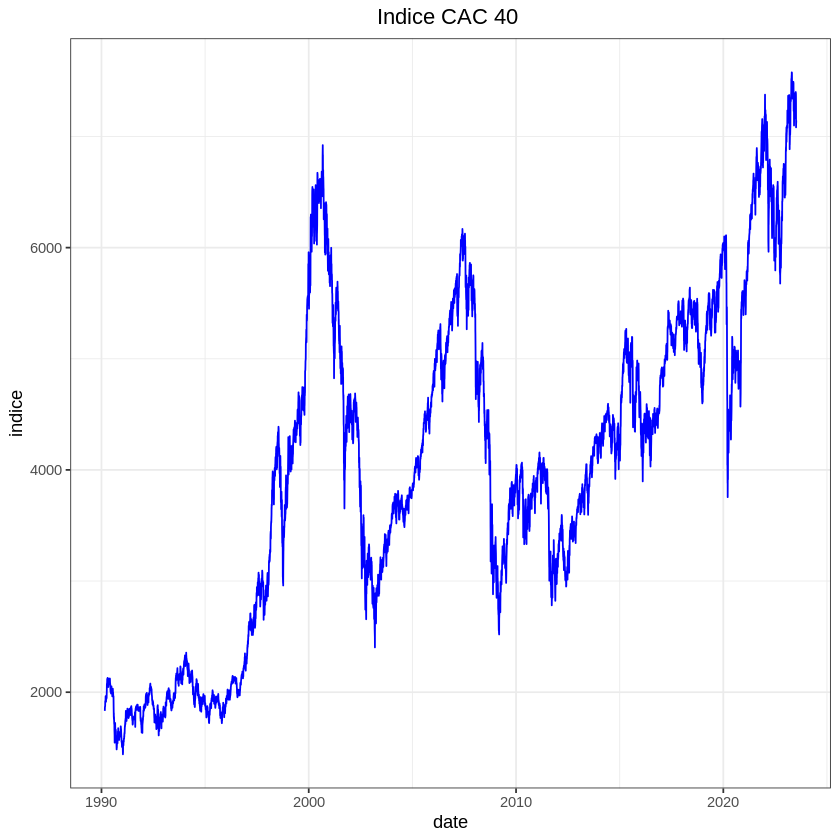

In [14]:
library(ggplot2)
p1<-ggplot(data=CAC40_df,aes(x=Date,y=Adj.Close))+geom_line(colour='blue')+ggtitle('Indice CAC 40 ')+xlab('date')+ylab('indice')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p1

## Question 3:  Calculez l'indice en logarithme (népérien) et faites sa représentation graphique.

### Réponses

> Calcul du log

In [19]:
CAC40_df=cbind(CAC40_df,log(CAC40_df$Close))

In [21]:
colnames(CAC40_df)[length(colnames(CAC40_df))]<-"Log_CAC"

> Représentation graphique

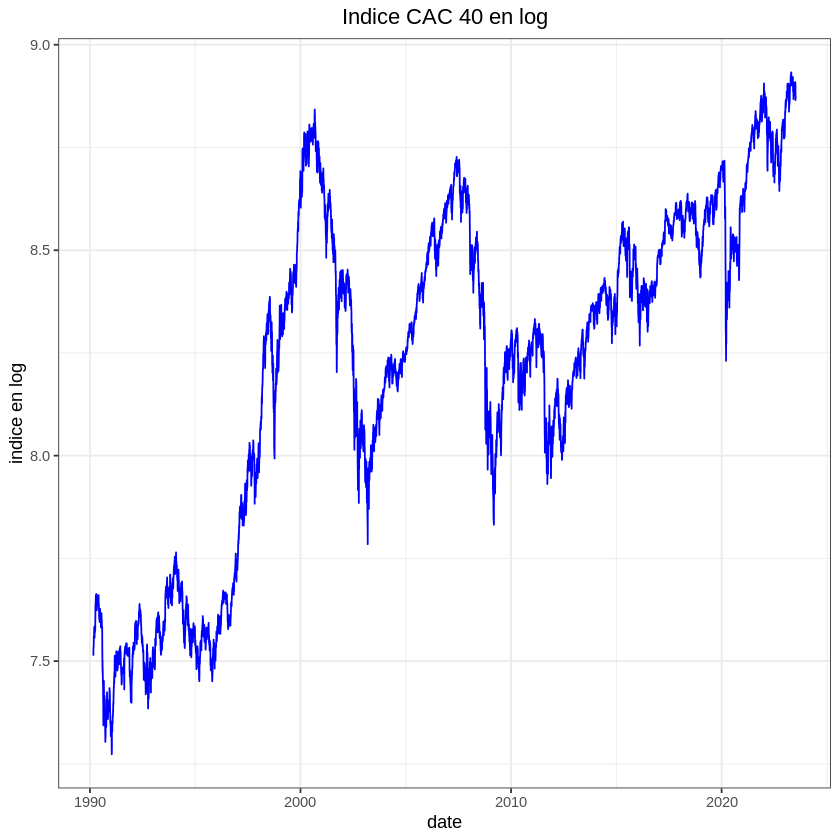

In [22]:
p2<-ggplot(data=CAC40_df,aes(x=Date,y=Log_CAC))+geom_line(colour='blue')+ggtitle('Indice CAC 40 en log')+xlab('date')+ylab('indice en log')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p2

 ## Question 4: Calculez et interprétez la différence première de l'indice (en log).

### Réponses

In [24]:
CAC40_df_diff=cbind(CAC40_df[-1,],diff(CAC40_df$Log_CAC))

In [25]:
colnames(CAC40_df_diff)[length(colnames(CAC40_df_diff))]<-"diff_log_CAC"

> Représentation graphique

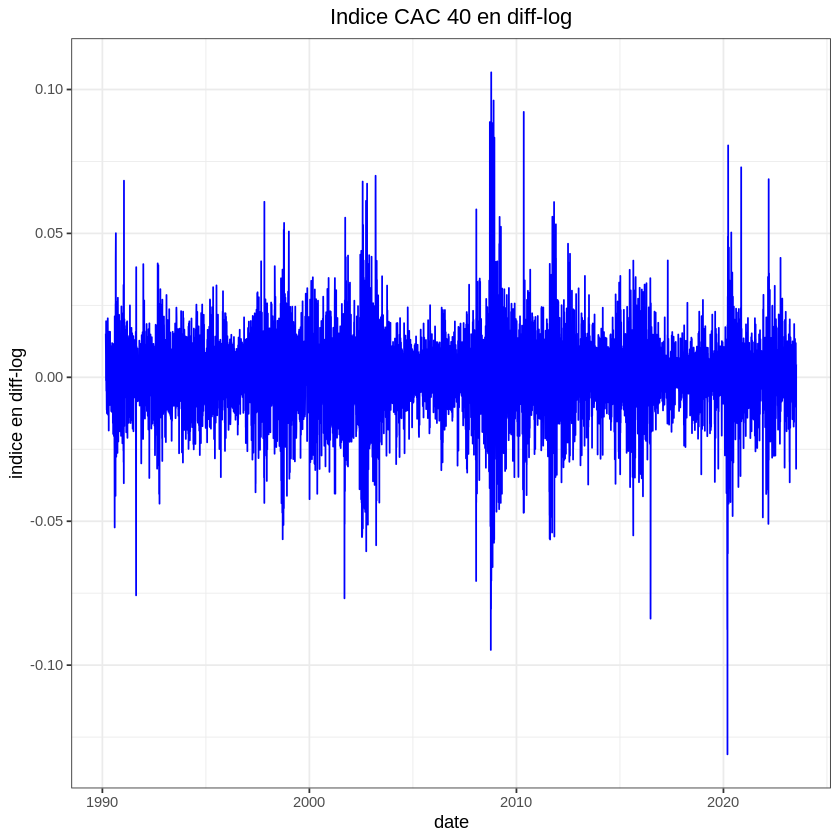

In [26]:
p3<-ggplot(data=CAC40_df_diff,aes(x=Date,y=diff_log_CAC))+geom_line(colour='blue')+ggtitle('Indice CAC 40 en diff-log')+xlab('date')+ylab('indice en diff-log')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p3

## Question 5: Estimez et commentez les autocorrélogrammes simple et partiel de l'indice (en log) et de sa différence première.

### Réponses


> ACF et PACF du log de l'indice

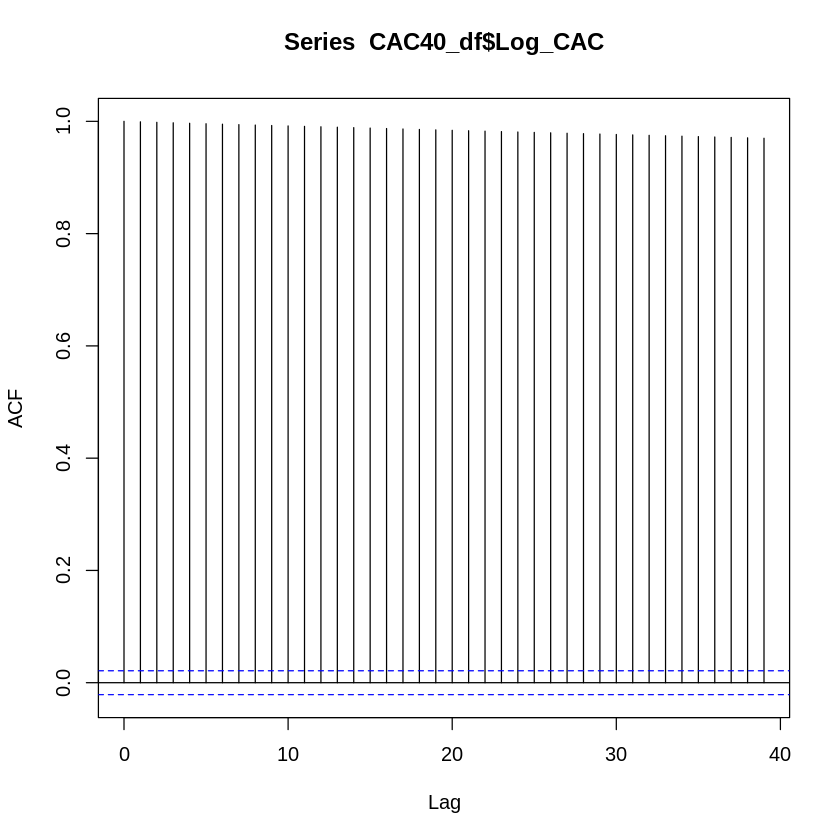

In [27]:
acf(CAC40_df$Log_CAC)

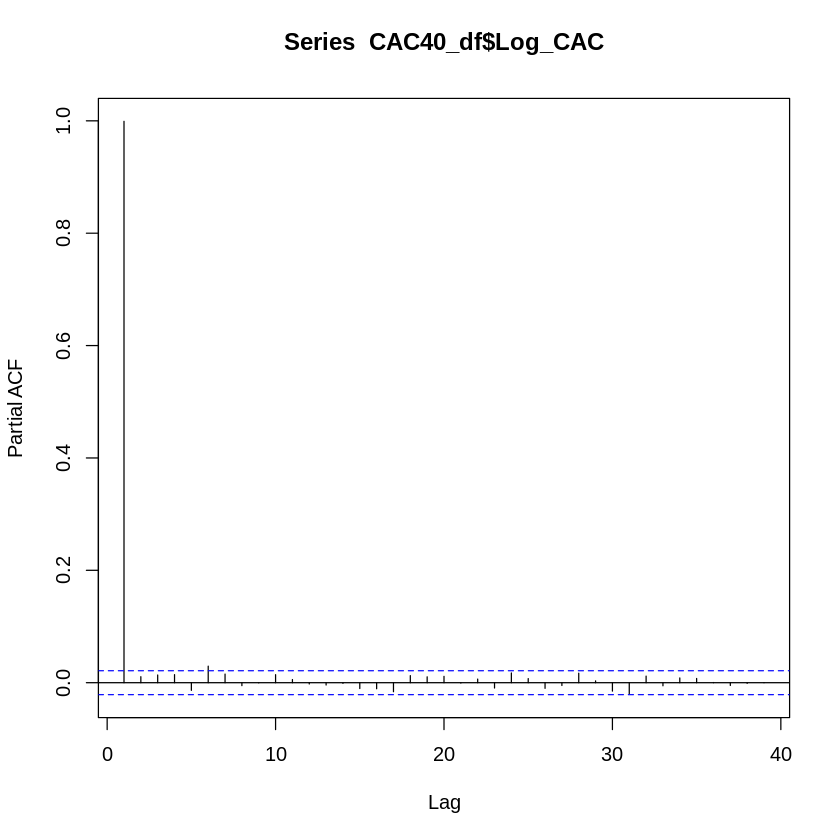

In [28]:
pacf(CAC40_df$Log_CAC)

> ACF et PACF de la diff du log de l'indice

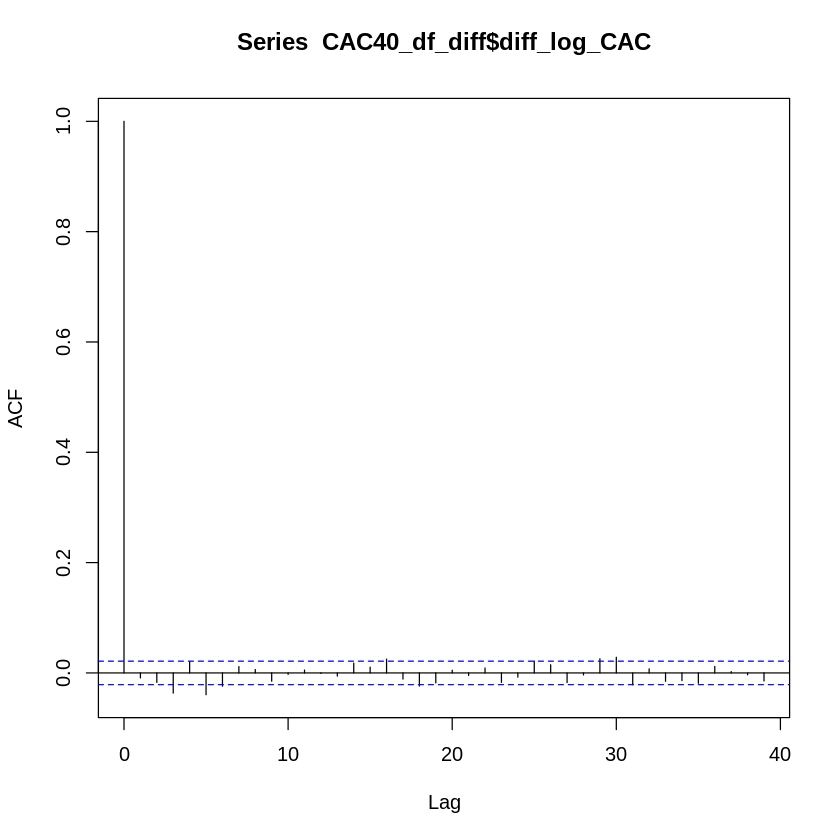

In [29]:
acf(CAC40_df_diff$diff_log_CAC)

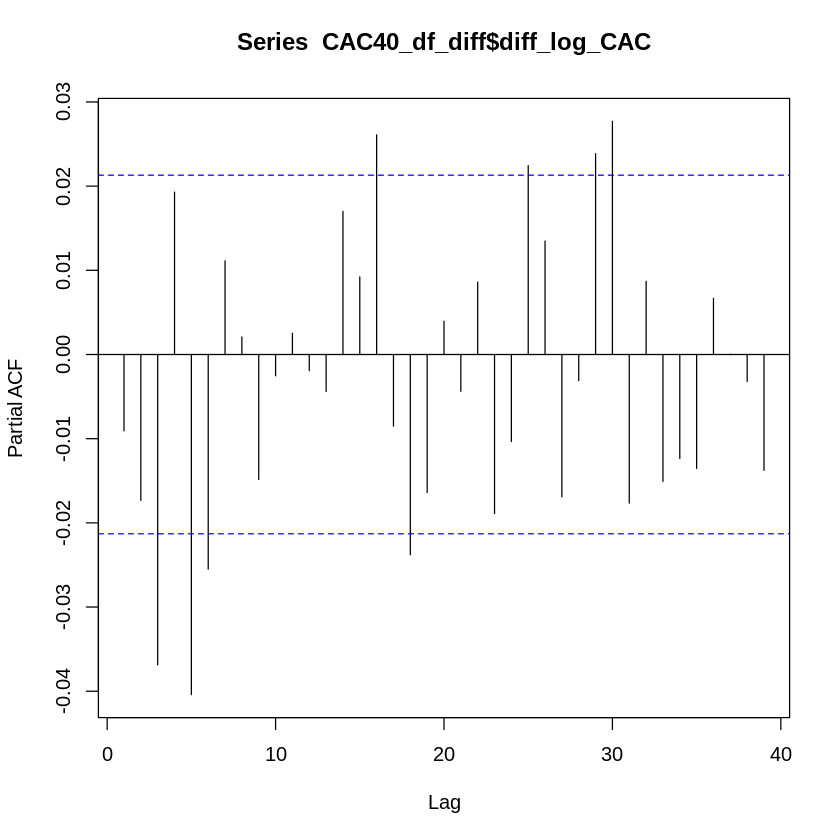

In [30]:
pacf(CAC40_df_diff$diff_log_CAC)